In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Input, Flatten, Dense, MaxPooling2D
#Though we won't be making any neural networks then still why are we including these layers because we don't want the output layer we only need the rest of the knowledge and at the output our output will be there that is only 2 neurons open eyes and closed eyes
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #this is for data augmentation

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
# changes la rahe h images mei like rotate kr diya and original mei kuch nahi hoga sbki duplicate banegi hence 5 duplicates banegi ek ki (pata nahi sahi h ya nahi)
# rescale isliye kr rahe h kyunki hamari images bahot badi hai 1./255 means 255 pixels ki krdo (I guess)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.2)

In [ ]:
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/mrlEyes_2018_01/Train', target_size=(80,80), batch_size=8, class_mode='categorical', subset='training' )
#ab hum is train data ko do hisso mei baatenge 1 is train data 80% and 1 is validation data 20%

validation_data = train_datagen.flow_from_directory('/content/drive/MyDrive/mrlEyes_2018_01/Train', target_size=(80,80), batch_size=8, class_mode='categorical', subset='validation' )

Found 6417 images belonging to 2 classes.
Found 1603 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/mrlEyes_2018_01/Test', target_size=(80,80), batch_size=8, class_mode='categorical')

Found 2353 images belonging to 2 classes.


In [ ]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2, activation='softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs = hmodel)
for layer in bmodel.layers:
  layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

In [ ]:
'''
Here you can see flattening layer is added and then dense layer with 64 neurons is also there and we do have dropout too after which output layer of 2 neurons is present
Dense means --> just a simple layer

'''

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/mrlEyes_2018_01/_models_', monitor='val_loss', save_best_only=True, verbose=3)

earlystop = EarlyStopping(monitor='val_loss', patience=7, verbose=3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=3)

callbacks = [checkpoint, earlystop, learning_rate]

In [ ]:
batchsize = 8

In [ ]:
#isiko baar baar chalana hoga model save krne k baad
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
History = model.fit_generator(train_data, steps_per_epoch=train_data.samples//batchsize, validation_data=validation_data, validation_steps=validation_data.samples//batchsize,
                    callbacks = callbacks, epochs=26)

Epoch 1/26


<ipython-input-19-38b39aecb512>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(train_data, steps_per_epoch=train_data.samples//batchsize, validation_data=validation_data, validation_steps=validation_data.samples//batchsize,


802/802 [==============================] - ETA: 0s - loss: 0.2072 - accuracy: 0.9212
Epoch 1: val_loss did not improve from 0.22709
802/802 [==============================] - 152s 179ms/step - loss: 0.2072 - accuracy: 0.9212 - val_loss: 0.2527 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 2/26
802/802 [==============================] - ETA: 0s - loss: 0.2008 - accuracy: 0.9229
Epoch 2: val_loss did not improve from 0.22709
802/802 [==============================] - 155s 193ms/step - loss: 0.2008 - accuracy: 0.9229 - val_loss: 0.2747 - val_accuracy: 0.8956 - lr: 0.0010
Epoch 3/26
802/802 [==============================] - ETA: 0s - loss: 0.1927 - accuracy: 0.9232
Epoch 3: val_loss did not improve from 0.22709
802/802 [==============================] - 142s 176ms/step - loss: 0.1927 - accuracy: 0.9232 - val_loss: 0.2286 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 4/26
802/802 [==============================] - ETA: 0s - loss: 0.1928 - accuracy: 0.9254
Epoch 4: val_loss did not improve from 0.2

802/802 [==============================] - 198s 247ms/step - loss: 0.1640 - accuracy: 0.9352 - val_loss: 0.2169 - val_accuracy: 0.9050 - lr: 1.0000e-04
Epoch 11/26
802/802 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9370
Epoch 11: val_loss did not improve from 0.21688
802/802 [==============================] - 154s 192ms/step - loss: 0.1538 - accuracy: 0.9370 - val_loss: 0.2292 - val_accuracy: 0.9081 - lr: 1.0000e-04
Epoch 12/26
802/802 [==============================] - ETA: 0s - loss: 0.1541 - accuracy: 0.9387
Epoch 12: val_loss did not improve from 0.21688
802/802 [==============================] - 155s 193ms/step - loss: 0.1541 - accuracy: 0.9387 - val_loss: 0.2288 - val_accuracy: 0.9094 - lr: 1.0000e-04
Epoch 13/26
802/802 [==============================] - ETA: 0s - loss: 0.1648 - accuracy: 0.9368
Epoch 13: val_loss improved from 0.21688 to 0.20817, saving model to /content/drive/MyDrive/mrlEyes_2018_01/_models_


802/802 [==============================] - 181s 226ms/step - loss: 0.1648 - accuracy: 0.9368 - val_loss: 0.2082 - val_accuracy: 0.9175 - lr: 1.0000e-04
Epoch 14/26
802/802 [==============================] - ETA: 0s - loss: 0.1621 - accuracy: 0.9365
Epoch 14: val_loss improved from 0.20817 to 0.20768, saving model to /content/drive/MyDrive/mrlEyes_2018_01/_models_


802/802 [==============================] - 202s 252ms/step - loss: 0.1621 - accuracy: 0.9365 - val_loss: 0.2077 - val_accuracy: 0.9125 - lr: 1.0000e-04
Epoch 15/26
802/802 [==============================] - ETA: 0s - loss: 0.1648 - accuracy: 0.9367
Epoch 15: val_loss did not improve from 0.20768
802/802 [==============================] - 154s 192ms/step - loss: 0.1648 - accuracy: 0.9367 - val_loss: 0.2172 - val_accuracy: 0.9069 - lr: 1.0000e-04
Epoch 16/26
802/802 [==============================] - ETA: 0s - loss: 0.1546 - accuracy: 0.9388
Epoch 16: val_loss did not improve from 0.20768
802/802 [==============================] - 154s 192ms/step - loss: 0.1546 - accuracy: 0.9388 - val_loss: 0.2188 - val_accuracy: 0.9081 - lr: 1.0000e-04
Epoch 17/26
802/802 [==============================] - ETA: 0s - loss: 0.1523 - accuracy: 0.9415
Epoch 17: val_loss did not improve from 0.20768

Epoch 17: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
802/802 [=====================

In [ ]:
model.save('/content/drive/MyDrive/mrlEyes_2018_01/_models_/partial/final.h5')

In [ ]:
result = model.evaluate_generator(validation_data, steps=16)
print('validation loss and accuracy are: ',result)

<ipython-input-23-918cee6426ef>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result = model.evaluate_generator(validation_data, steps=16)


validation loss and accuracy are:  [0.18301866948604584, 0.921875]


In [ ]:
print(History.history)#print karte hi notepad pr paste krna h

{'loss': [0.2071574330329895, 0.20076671242713928, 0.19267617166042328, 0.19276277720928192, 0.18934640288352966, 0.18959929049015045, 0.19007988274097443, 0.17610451579093933, 0.1696189045906067, 0.16396084427833557, 0.15381568670272827, 0.1540772169828415, 0.16481758654117584, 0.16210107505321503, 0.16483817994594574, 0.15462630987167358, 0.15228401124477386, 0.15597274899482727, 0.16125138103961945, 0.15731775760650635, 0.1613837331533432], 'accuracy': [0.9212045669555664, 0.9229208827018738, 0.9232329726219177, 0.9254173636436462, 0.9294741749763489, 0.924481213092804, 0.9260414838790894, 0.9313465356826782, 0.9343111515045166, 0.9352473020553589, 0.9369636178016663, 0.9386799931526184, 0.9368076324462891, 0.9364955425262451, 0.9366515874862671, 0.9388360381126404, 0.94148850440979, 0.9413325190544128, 0.9366515874862671, 0.9391480684280396, 0.9413325190544128], 'val_loss': [0.25272542238235474, 0.27473559975624084, 0.22864343225955963, 0.2529691457748413, 0.22717688977718353, 0.26

In [ ]:
from keras.models import load_model

In [ ]:
new_model = load_model('/content/drive/MyDrive/mrlEyes_2018_01/_models_/partial/final.h5')

In [ ]:
model.save('/content/drive/MyDrive/mrlEyes_2018_01/_models_/partial/first.h5') #only 1 epoch

In [ ]:
acc_train, loss_train = new_model.evaluate_generator(train_data, steps = 16)
print(acc_train)
print(loss_train)

<ipython-input-9-bafa75701154>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_train, loss_train = new_model.evaluate_generator(train_data, steps = 16)


0.17814144492149353
0.9296875


In [ ]:
acc_valid, loss_valid = new_model.evaluate_generator(validation_data, steps = 16)
print(acc_valid)
print(loss_valid)

<ipython-input-10-78fa9828eb6f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_valid, loss_valid = new_model.evaluate_generator(validation_data, steps = 16)


0.1293209195137024
0.953125


In [ ]:
acc_test, loss_test = new_model.evaluate_generator(test_data, steps = 16)
print(acc_test)
print(loss_test)

<ipython-input-11-2f97bf039bca>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_test, loss_test = new_model.evaluate_generator(test_data, steps = 16)


0.13871482014656067
0.953125


In [ ]:
History = {'loss': [0.28894132375717163, 0.22940072417259216, 0.20383375883102417, 0.20985274016857147, 0.2071574330329895, 0.20076671242713928, 0.19267617166042328, 0.19276277720928192, 0.18934640288352966, 0.18959929049015045, 0.19007988274097443, 0.17610451579093933, 0.1696189045906067, 0.16396084427833557, 0.15381568670272827, 0.1540772169828415, 0.16481758654117584, 0.16210107505321503, 0.16483817994594574, 0.15462630987167358, 0.15228401124477386, 0.15597274899482727, 0.16125138103961945, 0.15731775760650635, 0.1613837331533432], 'accuracy': [0.8862537145614624, 0.9115306735038757, 0.9179279208183289, 0.9166796803474426, 0.9212045669555664, 0.9229208827018738, 0.9232329726219177, 0.9254173636436462, 0.9294741749763489, 0.924481213092804, 0.9260414838790894, 0.9313465356826782, 0.9343111515045166, 0.9352473020553589, 0.9369636178016663, 0.9386799931526184, 0.9368076324462891, 0.9364955425262451, 0.9366515874862671, 0.9388360381126404, 0.94148850440979, 0.9413325190544128, 0.9366515874862671, 0.9391480684280396, 0.9413325190544128], 'val_loss': [0.2614869773387909, 0.2444923371076584, 0.25583699345588684, 0.22708660364151, 0.25272542238235474, 0.27473559975624084, 0.22864343225955963, 0.2529691457748413, 0.22717688977718353, 0.26981329917907715, 0.22893579304218292, 0.24838802218437195, 0.23009958863258362, 0.21688047051429749, 0.22924141585826874, 0.22876042127609253, 0.20817141234874725, 0.2076786458492279, 0.2171715348958969, 0.21881042420864105, 0.21887129545211792, 0.23503528535366058, 0.23969118297100067, 0.23789800703525543, 0.21941709518432617], 'val_accuracy': [0.8768749833106995, 0.8943750262260437, 0.8912500143051147, 0.9081249833106995, 0.8912500143051147, 0.8956249952316284, 0.9075000286102295, 0.8993750214576721, 0.9043750166893005, 0.8993750214576721, 0.9081249833106995, 0.9006249904632568, 0.9068750143051147, 0.9049999713897705, 0.9081249833106995, 0.909375011920929, 0.9175000190734863, 0.9125000238418579, 0.9068750143051147, 0.9081249833106995, 0.9068750143051147, 0.9068750143051147, 0.9081249833106995, 0.9150000214576721, 0.9100000262260437], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.000100000005, 0.000100000005, 0.000100000005, 0.000100000005, 0.000100000005, 0.000100000005, 0.000100000005, 0.000100000005, 0.000100000005, 1.0000001e-05, 1.0000001e-05, 1.0000001e-05, 1.0000001e-06]}

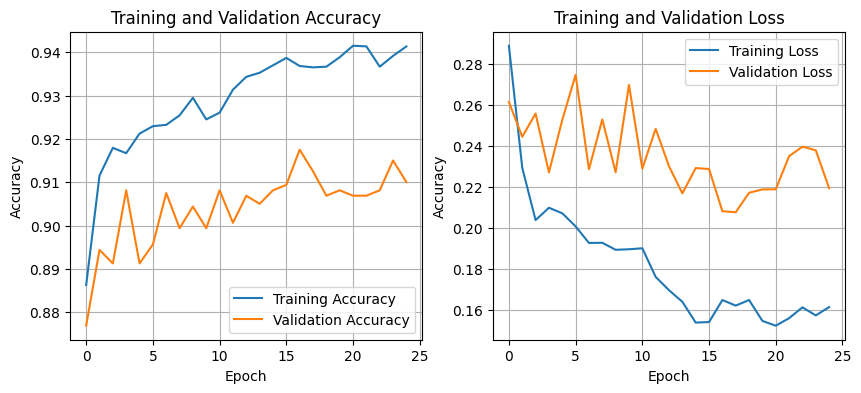

In [ ]:
import matplotlib.pyplot as plt
epochs = 25

acc = History['accuracy']
val_acc = History['val_accuracy']

loss = History['loss']
val_loss = History['val_loss']

epochs_range = range(epochs)
#plot traing and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

#plot traing and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Generate predictions for the validation data
y_pred = new_model.predict(test_data)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the validation generator
y_true = test_data.classes

# Get the class labels
class_labels = list(test_data.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

295/295 [==============================] - 562s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Closed Eyes       0.49      0.51      0.50      1147
   Open Eyes       0.52      0.50      0.51      1206

    accuracy                           0.50      2353
   macro avg       0.50      0.50      0.50      2353
weighted avg       0.50      0.50      0.50      2353



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Generate predictions for the validation data
y_pred = new_model.predict(test_data)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("\nAccuracy:", accuracy)

# Plot confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Convert predicted probabilities to class labels
#y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the validation generator

# Get the class labels
#class_labels = list(test_data.class_indices.keys())

# Print classification report
#print("Classification Report:")
#print(classification_report(y_true, y_pred_classes, target_names=class_labels))

295/295 [==============================] - 591s 2s/step


ValueError: ignored